In [ ]:
# Analyse data taken from my Spotify account

In [1]:
# import modules and data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

df = pd.read_json("C:\\Users\\shaze\\Documents\\spotify_data\\Streaming_History_Audio_2014-2017_0.json")

In [34]:
# see what data has been provided
df.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2014-10-04T17:52:38Z,11159003297,"iOS 8.0.2 (iPhone4,1)",9427,GB,94.3.66.207,unknown,Fancy,Iggy Azalea,The New Classic,...,None,None,None,,fwdbtn,False,1.0,False,0,False
1,2014-10-04T17:52:43Z,11159003297,"iOS 8.0.2 (iPhone4,1)",5201,GB,94.3.66.207,unknown,Blame It on Me,George Ezra,Wanted on Voyage,...,None,None,None,fwdbtn,fwdbtn,True,1.0,False,0,False
2,2014-10-04T17:52:54Z,11159003297,"iOS 8.0.2 (iPhone4,1)",11377,GB,94.3.66.207,unknown,A Sky Full of Stars,Coldplay,Ghost Stories,...,None,None,None,fwdbtn,fwdbtn,True,1.0,False,0,False
3,2014-10-04T17:52:55Z,11159003297,"iOS 8.0.2 (iPhone4,1)",2211,GB,94.3.66.207,unknown,Maps,Maroon 5,V,...,None,None,None,fwdbtn,fwdbtn,True,1.0,False,0,False
4,2014-10-04T17:52:57Z,11159003297,"iOS 8.0.2 (iPhone4,1)",1764,GB,94.3.66.207,unknown,Thinking out Loud,Ed Sheeran,x,...,None,None,None,fwdbtn,fwdbtn,True,1.0,False,0,False


In [9]:
# create shortcuts for the track name and artist since these could be commonly used columns
track = 'master_metadata_track_name'
artist = 'master_metadata_album_artist_name'

ts                                    object
username                               int64
platform                              object
ms_played                              int64
conn_country                          object
ip_addr_decrypted                     object
user_agent_decrypted                  object
master_metadata_track_name            object
master_metadata_album_artist_name     object
master_metadata_album_album_name      object
spotify_track_uri                     object
episode_name                          object
episode_show_name                     object
spotify_episode_uri                   object
reason_start                          object
reason_end                            object
shuffle                                 bool
skipped                              float64
offline                                 bool
offline_timestamp                      int64
incognito_mode                          bool
dtype: object

In [15]:
# for now i'm only interested in which song was played and when. the title and artist are enough to name that tune
# create a dataframe using the three columns of interest
data_raw = {
    'Date Played' : df['ts'],
    'Track' : df[track],
    'Artist' : df[artist]
}

data = pd.DataFrame(data_raw)

In [26]:
# check the datatypes in the new dataframe
data.dtypes

Date Played    object
Track          object
Artist         object
dtype: object

In [28]:
# change the datatype of the date played column
data['Date Played'] = pd.to_datetime(data['Date Played'])
data.dtypes

Date Played    datetime64[ns, UTC]
Track                       object
Artist                      object
dtype: object

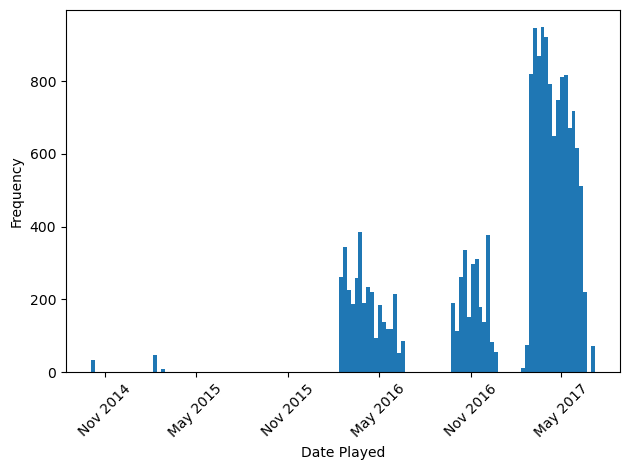

In [40]:
# i want to see when i listened to the most music so i created a histogram using date played
plt.hist(data['Date Played'], bins = int(np.sqrt(len(data['Date Played']))))
plt.xlabel('Date Played')
plt.ylabel('Frequency')
# i want the histogram x axis to read easier. i want it to create a label every 6 months
min_date = min(data['Date Played'])
max_date = max(data['Date Played'])
six_month_intervals = pd.date_range(start = min_date, end = max_date, freq = '6MS')
plt.xticks(six_month_intervals, [date.strftime('%b %Y') for date in six_month_intervals], rotation = 45)
plt.tight_layout()
plt.show()
# must've susbcribed to apple music in 2015. is that when apple music started? maybe there was an ofer?
# there's also a clear increase in how often i used spotify in early 2017

In [85]:
# i want to see what my top 30 most listened to artists were
artists = data.groupby('Artist').size().reset_index(name ='No. of times played')
most_played = pd.DataFrame(artists).sort_values(by = 'No. of times played', ascending = False)
top_30 = most_played.head(30)

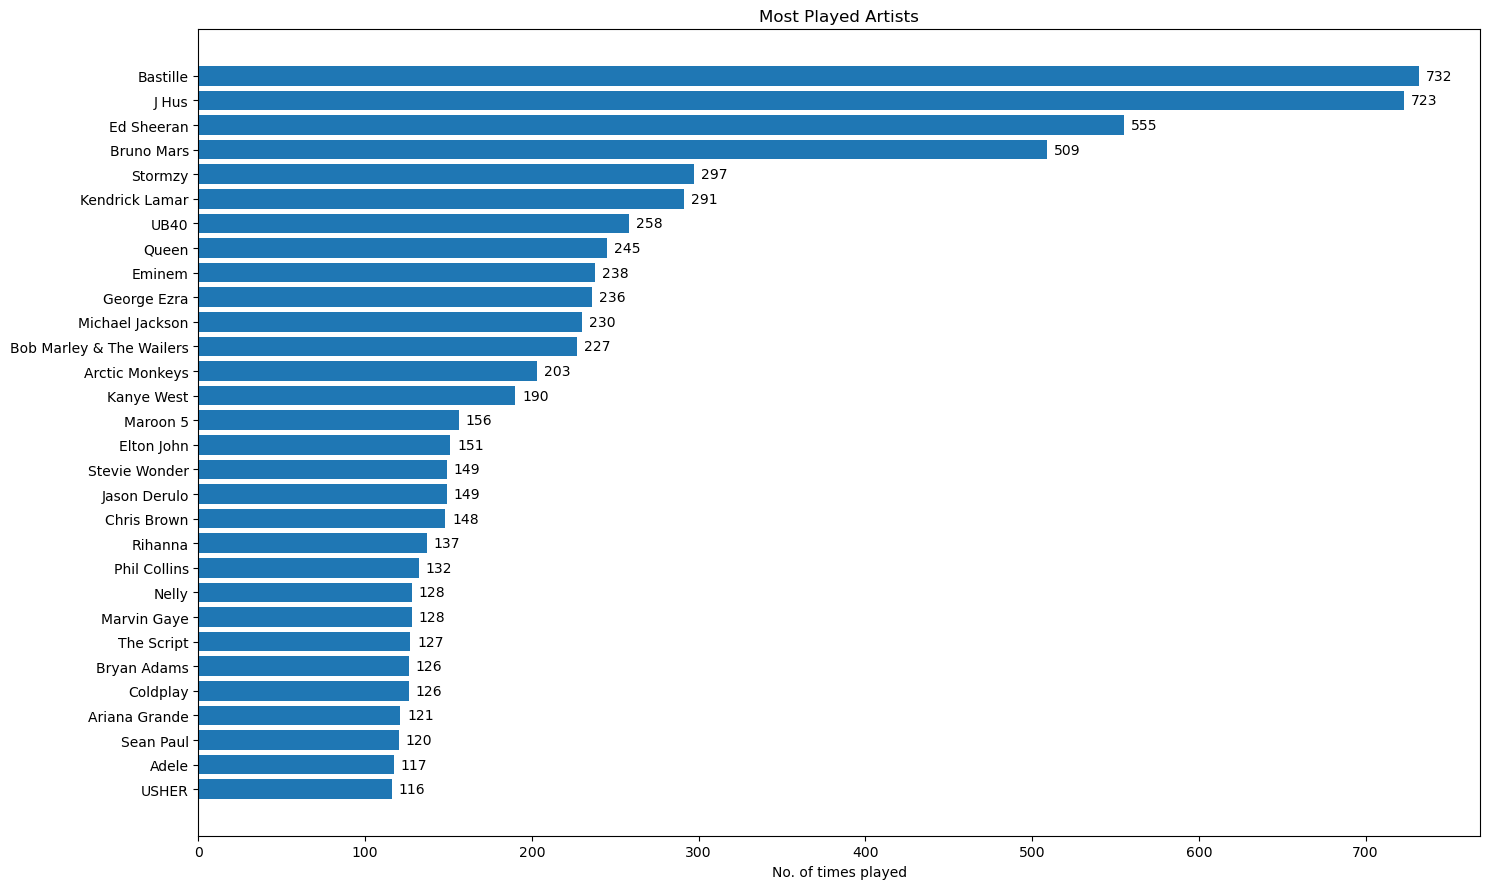

In [150]:
# i want to visualise this so i'm creating a bar chart
#top_30x = top_30[::-1]
plt.figure(figsize=(15,9))
bars = plt.barh(top_30['Artist'], top_30['No. of times played'])
plt.title('Most Played Artists')
plt.xlabel('No. of times played')
plt.bar_label(bars, labels=top_30['No. of times played'], label_type='edge', fontsize=10, padding = 5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

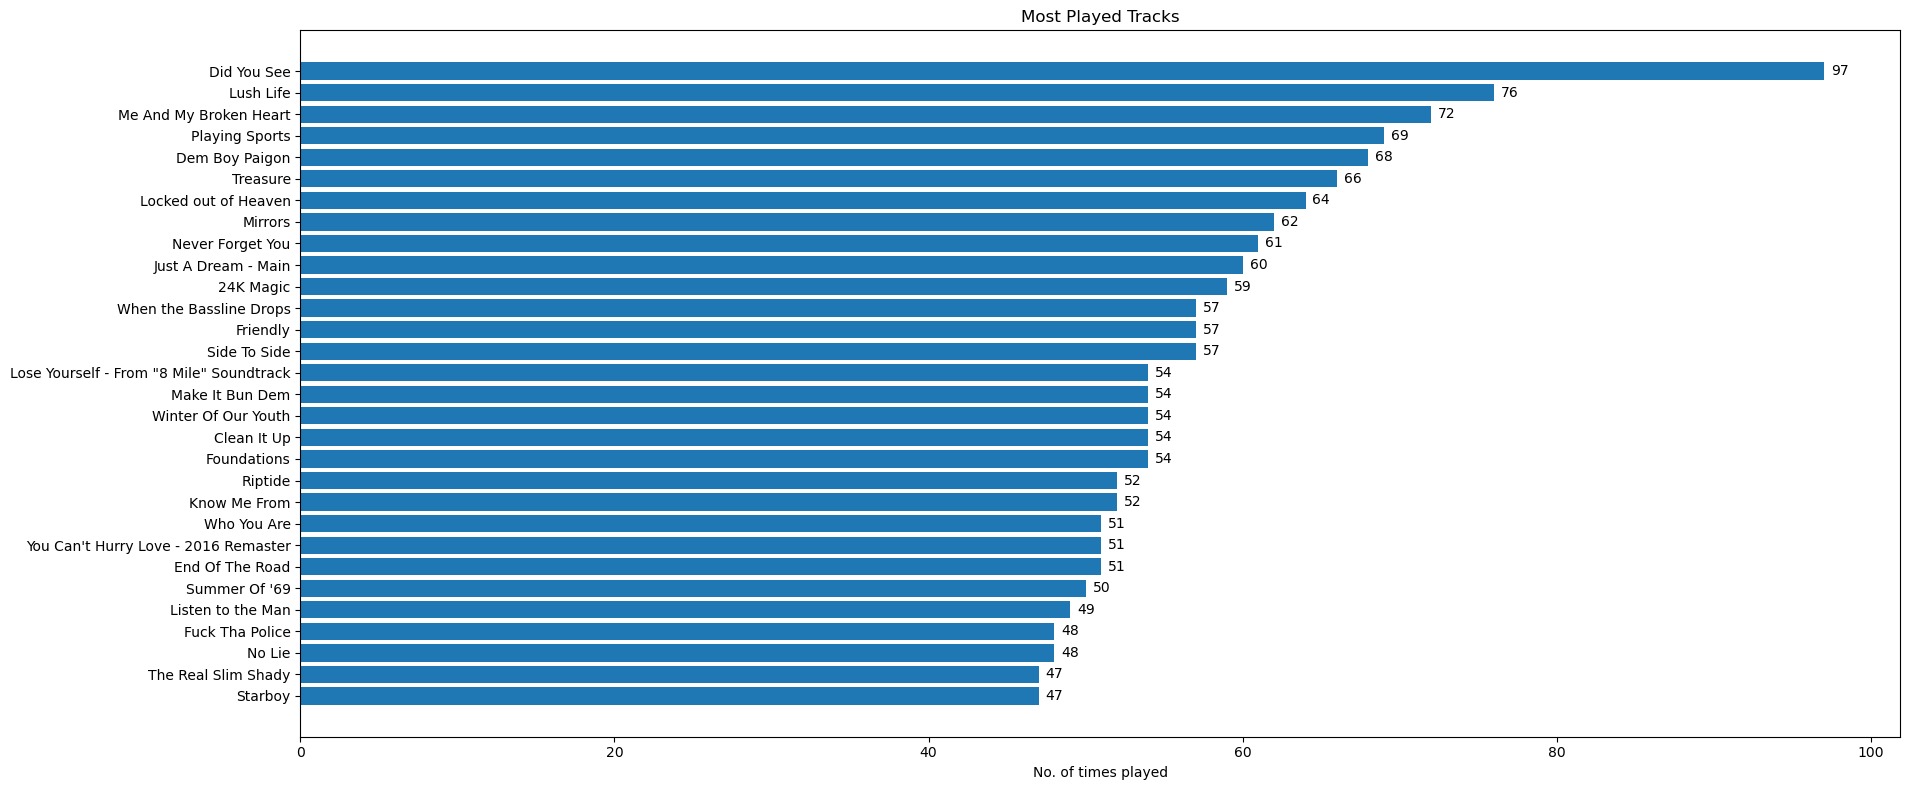

In [308]:
# i want to see my top 30 songs
# i want to see what my top 30 most listened to artists were
tracks = data.groupby('Track').size().reset_index(name ='No. of times played')
most_played_tracks = pd.DataFrame(tracks).sort_values(by = 'No. of times played', ascending = False)
top_30_tracks = most_played_tracks.head(30)

plt.figure(figsize=(19.2,8))
bars = plt.barh(top_30_tracks['Track'], top_30_tracks['No. of times played'])
plt.title('Most Played Tracks')
plt.xlabel('No. of times played')
plt.bar_label(bars, labels=top_30_tracks['No. of times played'], label_type='edge', fontsize=10, padding = 5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [255]:
# i want to see my most played artist by month
# *EDIT* I want to do the same with tracks by month which is easy enough since its the same method as the artists

# data['Date Played'].dt.month_name()


artist_by_month = data.groupby([data['Date Played'].dt.month_name().rename('Month'), data['Date Played'].dt.year.rename('Year'), data['Artist']]).size().reset_index(name = 'Plays')
max_artist = artist_by_month.loc[artist_by_month.groupby(['Year', 'Month'])['Plays'].idxmax()]

########################################################################

track_by_month = data.groupby([data['Date Played'].dt.month_name().rename('Month'), data['Date Played'].dt.year.rename('Year'), data['Track']]).size().reset_index(name = 'Plays')
max_track = track_by_month.loc[track_by_month.groupby(['Year', 'Month'])['Plays'].idxmax()]

In [257]:
max_track

,Month,Year,Track,Plays
5208,October,2014,A Sky Full of Stars,3
1298,February,2015,Listen to the Man,12
37,April,2016,Cheap Thrills (feat. Sean Paul),19
1073,August,2016,Foundations,1
1203,December,2016,Playing Sports,37
1422,February,2016,When the Bassline Drops,31
1837,June,2016,No Lie,7
2658,March,2016,Hips Don't Lie (feat. Wyclef Jean),19
3877,May,2016,Gold,29
5119,November,2016,Say My Name,18


In [258]:
#convert the date column into the format I want it (January 2014 etc.) na dget rid of columns used in the previous grouping
max_artist['Date'] = max_artist['Month'].astype(str) + ' ' +max_artist['Year'].astype(str)
max_artist['Date'] = pd.to_datetime(max_artist['Date']).dt.strftime('%B %Y')
max_artist = max_artist.drop(['Month', 'Year'], axis = 1)

##########################################################################

max_track['Date'] = max_track['Month'].astype(str) + ' ' +max_track['Year'].astype(str)
max_track['Date'] = pd.to_datetime(max_track['Date']).dt.strftime('%B %Y')
max_track = max_track.drop(['Month', 'Year'], axis = 1)

In [259]:
max_track

,Track,Plays,Date
5208,A Sky Full of Stars,3,October 2014
1298,Listen to the Man,12,February 2015
37,Cheap Thrills (feat. Sean Paul),19,April 2016
1073,Foundations,1,August 2016
1203,Playing Sports,37,December 2016
1422,When the Bassline Drops,31,February 2016
1837,No Lie,7,June 2016
2658,Hips Don't Lie (feat. Wyclef Jean),19,March 2016
3877,Gold,29,May 2016
5119,Say My Name,18,November 2016


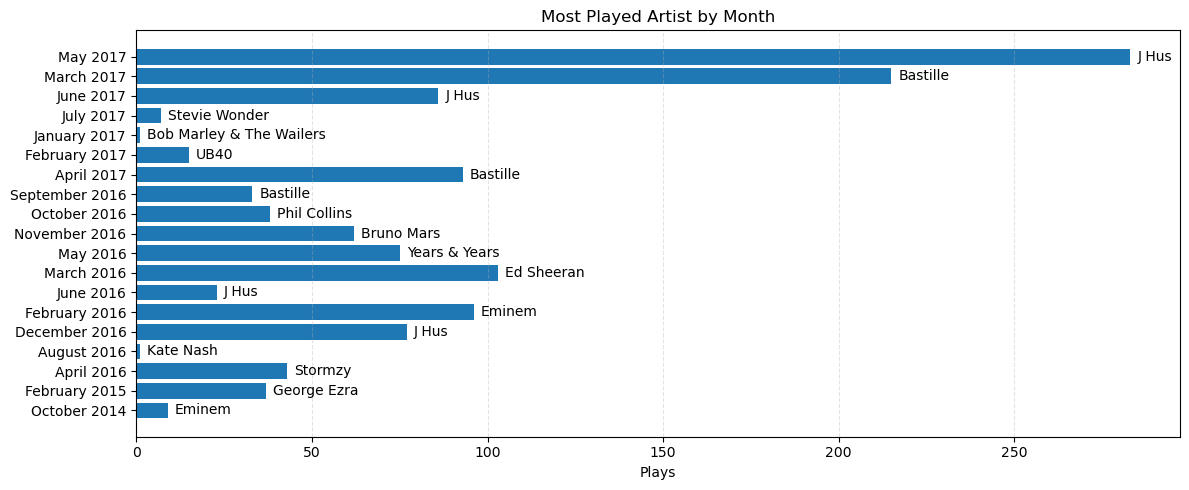

In [303]:
#visualise
plt.figure(figsize=(12,5))
bars = plt.barh(max_artist['Date'], max_artist['Plays'])
plt.title('Most Played Artist by Month')
plt.xlabel('Plays')
plt.bar_label(bars, labels = max_artist['Artist'], label_type='edge', fontsize=10, padding = 5)
#plt.gca().invert_yaxis()
plt.grid(axis = 'x', linestyle = '--', alpha = 0.35)
plt.tight_layout()
plt.show()

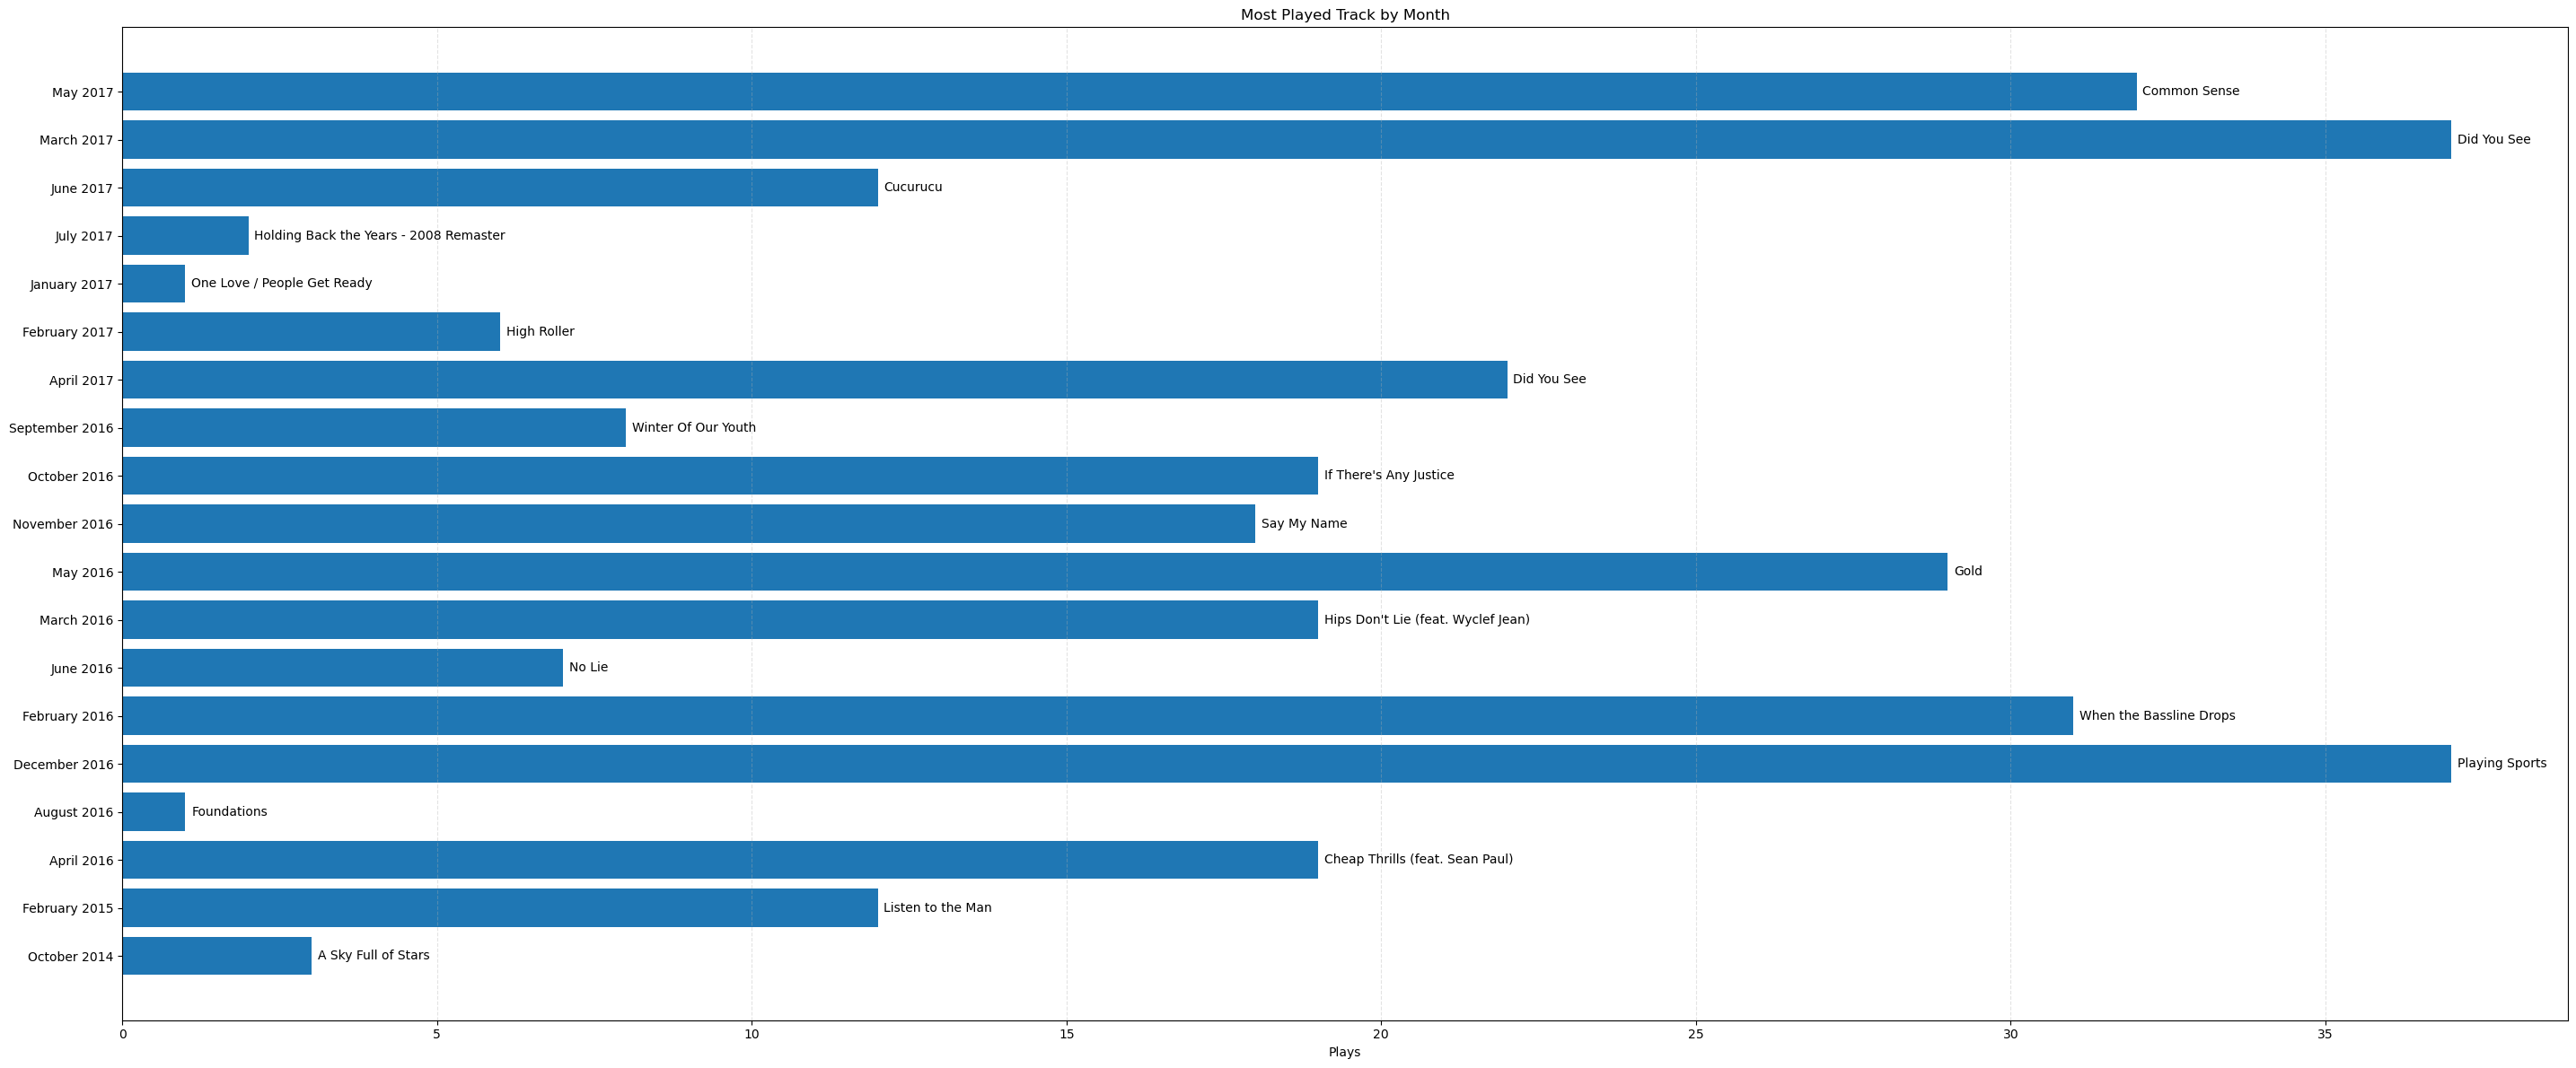

In [309]:
#visualise tracks
plt.figure(figsize=(28.8,12))
bars = plt.barh(max_track['Date'], max_track['Plays'])
plt.title('Most Played Track by Month')
plt.xlabel('Plays')
plt.bar_label(bars, labels = max_track['Track'], label_type='edge', fontsize=10, padding = 5)
#plt.gca().invert_yaxis()
plt.grid(axis = 'x', linestyle = '--', alpha = 0.35)
plt.tight_layout()
plt.savefig('max_track.png', bbox_inches='tight', dpi=800)
plt.show()

In [270]:
data.to_csv('spotify_tracks__2014_2017', index = False)